# Statistical Analysis for the Efficiency of the Developed VSCode Extension (CodeGuardian)

This notebook is for the statistical analysis of the efficiency of the developed VSCode extension (CodeGuardian) in terms of the task completion time and the number of errors made by the participants. To do so, we have a total of 22 participants and we have split them into two groups: 

1. Experiment Group (Group 1): Participants who used the VSCode editor with the CodeGuardian extension.
2. Control Group (Group 2): Participants who used the VSCode editor without the CodeGuardian extension (instead, used Internet to search for the solutions but not using the LLM-based application).

Each group consists of 11 participants. The participants were asked to complete a set of 6 challenges in order to identify the most possible vulnerability in the code. There are 6 snippers written in C, C++, JS, Java, and Python. One snippet for each language except for Python (2 snippets). 

In [2]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats
from helper import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker

# If there is no images folder, create one
if not os.path.exists('./images'):
    os.makedirs('./images')

# Load the data from the result excel files of group 1 and group 2
group1 = pd.read_excel('./excel_files/group1_postprocessed.xlsx')
group2 = pd.read_excel('./excel_files/group2_postprocessed.xlsx')

In [3]:
# Show the first 5 rows of the data in group 1
group1.head()

,ID,Start time,Completion time,Your Answer for q1.c,Your Answer for q1.cpp,Your Answer for q1.java,Your Answer for q1.js,Your Answer for q1.py,Your Answer for q2.py
0,1,2024-04-09 22:10:48,2024-04-09 22:35:27,CWE-125,CWE-78,CWE-190,CWE-22,Not vulnerable,CWE-79
1,2,2024-04-10 13:06:49,2024-04-10 13:36:16,CWE-125,CWE-78,No vulnerability,CWE-22,Not vulnerable,CWE-79
2,3,2024-04-10 15:11:37,2024-04-10 15:26:37,CWE-125,CWE-78,CWE-190,CWE-22,Not vulnerable,CWE-79
3,4,2024-04-10 15:39:40,2024-04-10 15:55:08,CWE-125,CWE-78,CWE-190,CWE-22,Not vulnerable,CWE-79
4,5,2024-04-11 10:34:09,2024-04-11 10:49:06,CWE-125,CWE-78,CWE-190,CWE-22,"Fine except edge cases -- you can ""overflow"" s...",CWE-79


In [4]:
group2.head()

,ID,Start time,Completion time,Your Answer for q1.c,Your Answer for q1.cpp,Your Answer for q1.java,Your Answer for q1.js,Your Answer for q1.py,Your Answer for q2.py
0,1,2024-04-10 17:58:40,2024-04-10 18:19:36,CWE-125,CWE-78,CWE-190,CWE-22,Not vulnerable,CWE-79
1,2,2024-04-11 14:03:59,2024-04-11 14:24:31,CWE-125,CWE-77,CWE-190,CWE-22,missing error handling,CWE-1336
2,3,2024-04-11 17:03:04,2024-04-11 18:09:24,CWE-125,file not found,CWE-190,if js keeps to compile the code even after thr...,regarding capital/lower letter - correct. The ...,Not vulnerable
3,4,2024-04-12 21:09:58,2024-04-12 21:47:40,CWE-125,CWE-20,CWE-119,"vulnerability, treeish !== ""_"" not enough of a...",Not vulnerable,Vulnerability with leaked user information fro...
4,5,2024-04-13 12:16:52,2024-04-13 12:58:41,Not vulnerable,Not vulnerable,Byte.MAX_VALUE seems to have no affect or mayb...,"one project in the array ""projects = []"" -> ma...",Not vulnerable,"maybe a missing part with 'if __name__ == ""__m..."


In [5]:
# Drop columns of 'ID', 'Start time', and 'Completion time' from group 1 and group 2
group1 = group1.drop(columns=['ID', 'Start time', 'Completion time'])
group2 = group2.drop(columns=['ID', 'Start time', 'Completion time'])

Pre-process the both groups' data frames.

In [6]:
# Processing both data frames
processed_group1 = process_group(group1, correct_answers, cwe_hierarchy)
processed_group2 = process_group(group2, correct_answers, cwe_hierarchy)

In [7]:
processed_group1

,Your Answer for q1.c,Your Answer for q1.cpp,Your Answer for q1.java,Your Answer for q1.js,Your Answer for q1.py,Your Answer for q2.py
0,1,1,1,1,1,1
1,1,1,0,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,0,1
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,1,1,1,1,1,1
8,1,0,1,1,1,1
9,1,1,1,1,1,1


In [8]:
processed_group2

,Your Answer for q1.c,Your Answer for q1.cpp,Your Answer for q1.java,Your Answer for q1.js,Your Answer for q1.py,Your Answer for q2.py
0,1,1,1,1,1,1
1,1,0,1,1,0,0
2,1,0,1,0,0,0
3,1,0,0,0,1,0
4,0,0,0,0,1,0
5,1,0,1,0,1,0
6,1,1,1,0,1,0
7,0,0,1,0,1,0
8,0,0,1,0,0,0
9,0,0,0,1,1,0


In [9]:
# Also, make a new column of 'Total' in both data frames
processed_group1['Total'] = processed_group1.sum(axis=1)
processed_group2['Total'] = processed_group2.sum(axis=1)

# Make a new column of 'Accuracy' in both data frames. Accuracy is calculated by dividing the 'Total' column by 6, which is the total number of challenges in the experiment.
# We only need the two decimal places for the accuracy.
processed_group1['Accuracy'] = (processed_group1['Total'] / 6).round(2)
processed_group2['Accuracy'] = (processed_group2['Total'] / 6).round(2)

Finally, output the pre-processed data frames.

In [10]:
processed_group1

,Your Answer for q1.c,Your Answer for q1.cpp,Your Answer for q1.java,Your Answer for q1.js,Your Answer for q1.py,Your Answer for q2.py,Total,Accuracy
0,1,1,1,1,1,1,6,1.00
1,1,1,0,1,1,1,5,0.83
2,1,1,1,1,1,1,6,1.00
3,1,1,1,1,1,1,6,1.00
4,1,1,1,1,0,1,5,0.83
5,1,1,1,1,1,1,6,1.00
6,1,1,1,1,1,1,6,1.00
7,1,1,1,1,1,1,6,1.00
8,1,0,1,1,1,1,5,0.83
9,1,1,1,1,1,1,6,1.00


In [11]:
processed_group2

,Your Answer for q1.c,Your Answer for q1.cpp,Your Answer for q1.java,Your Answer for q1.js,Your Answer for q1.py,Your Answer for q2.py,Total,Accuracy
0,1,1,1,1,1,1,6,1.00
1,1,0,1,1,0,0,3,0.50
2,1,0,1,0,0,0,2,0.33
3,1,0,0,0,1,0,2,0.33
4,0,0,0,0,1,0,1,0.17
5,1,0,1,0,1,0,3,0.50
6,1,1,1,0,1,0,4,0.67
7,0,0,1,0,1,0,2,0.33
8,0,0,1,0,0,0,1,0.17
9,0,0,0,1,1,0,2,0.33


## Analysis of the Number of Correct Answers

First, we will visualize the summary statistics of processed_group1 and processed_group2. Then, we will perform the statistical tests to check if there is a significant difference between the two groups in terms of the number of correct answers made by the participants.

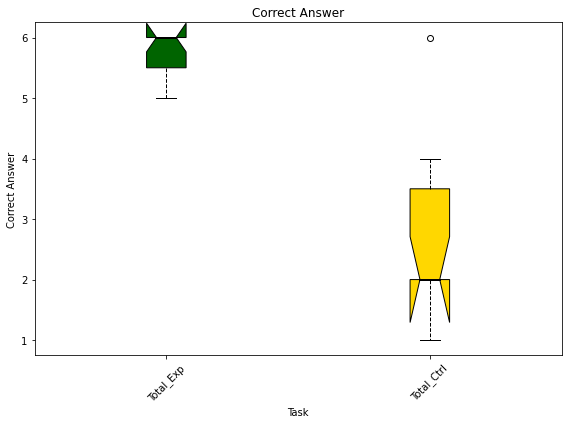

In [12]:

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# TODO: Reorder the columns 
# Create the box plots
labels = ['Total_Exp', 'Total_Ctrl']
box_data = [
    processed_group1.iloc[:, 6], processed_group2.iloc[:, 6]
]

colors = ['darkgreen', 'gold']

bp = ax.boxplot(box_data, labels=labels, notch=True, patch_artist=True)
# Set the colors and line widths of the box plot elements
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', linewidth=1)
    box.set_facecolor(color)

for median in bp['medians']:
    median.set(color='black', linewidth=2)
    
for whisker in bp['whiskers']:
    whisker.set_linestyle('--')  # Dashed line
    
# Set the title and labels
ax.set_title('Correct Answer')
ax.set_xlabel('Task')
ax.set_ylabel('Correct Answer')


# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

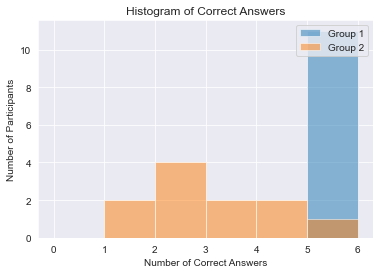

In [13]:
# Make a histogram of the 'Total' column in both data frames
sns.set_style("darkgrid")
plt.hist(processed_group1['Total'], bins=range(0, 7), alpha=0.5, label='Group 1')
plt.hist(processed_group2['Total'], bins=range(0, 7), alpha=0.5, label='Group 2')
plt.legend(loc='upper right')
plt.xlabel('Number of Correct Answers')
plt.ylabel('Number of Participants')
plt.title('Histogram of Correct Answers')
plt.show()

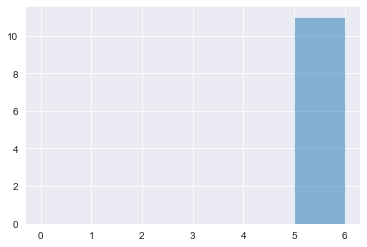

In [14]:
# Make a historgam of the 'Total' column in both data frames
plt.hist(processed_group1['Total'], bins=range(0, 7), alpha=0.5, label='Group 1')
plt.show()


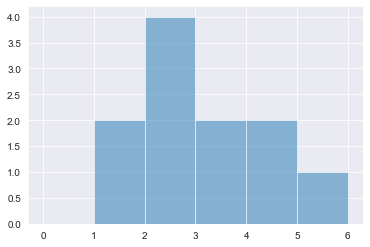

In [15]:
plt.hist(processed_group2['Total'], bins=range(0, 7), alpha=0.5, label='Group 2')
plt.show()

In [16]:
w, pvalue = stats.shapiro(processed_group1['Total'])
print("Shapiro-Wilk test for Group 1:", w, pvalue)

w, pvalue = stats.shapiro(processed_group2['Total'])
w, pvalue
print("Shapiro-Wilk test for Group 2:", w, pvalue)

Shapiro-Wilk test for Group 1: 0.5724058622066281 1.1574327323944895e-05
Shapiro-Wilk test for Group 2: 0.896631673726307 0.1680762158688195


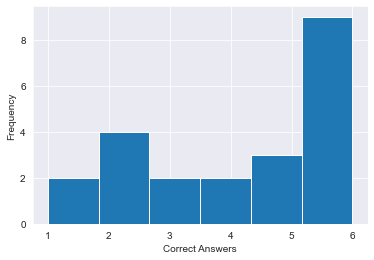

In [17]:
# Combine both groups into one DataFrame
combined_data = pd.concat([processed_group1['Total'], processed_group2['Total']])

# Plot the distribution of the total time taken for both groups
sns.histplot(combined_data, color=sns.color_palette("tab10")[0], alpha=1)
# plt.hist(group2['Total'].dt.total_seconds(), alpha=0.5)
# plt.legend(loc='upper right')
plt.xlabel('Correct Answers')
plt.ylabel('Frequency')
# plt.title('Histogram of Task Completion Time')
sns.set_style("darkgrid")

# Save it as pdf file
plt.savefig('./images/total_correct_ans_histogram.pdf')
plt.show()

In [18]:
w, pvalue = stats.shapiro(combined_data)
print("Shapiro-Wilk test for total (combined the group1 and group 2):", w, pvalue)

Shapiro-Wilk test for total (combined the group1 and group 2): 0.8235691508764211 0.0011983530954410885


Next, output the histogram of the challenge completion accuracy for both groups.

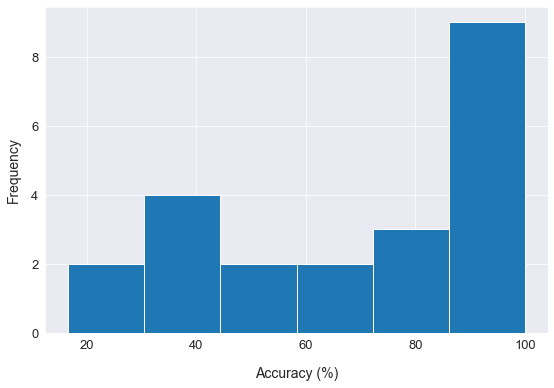

In [19]:
# Calculate accuracy as a percentage
accuracy_data = (combined_data / 6) * 100  # since there are 6 challenges

# set fig size
plt.figure(figsize=(9, 6))

# Plot the distribution of accuracy for both groups
sns.histplot(accuracy_data, color=sns.color_palette("tab10")[0], alpha=1)
plt.xlabel('Accuracy (%)', fontsize=14, labelpad=15)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
sns.set_style("darkgrid")

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Save it as pdf file
plt.savefig('./images/total_accuracy_histogram.pdf')
plt.show()

Based on the Shapiro-Wilk test, the p-value of group1 is 1.1574e-05; thus, we reject the null hypothesis that the data is normally distributed. For the p-value of group2, it is 0.1681; thus, we fail to reject the null hypothesis that the data is normally distributed. <bt><br>

Based on the result above, we will use the Mann-Whitney U test to compare the two groups because the data is not normally distributed.


## Perform the Mann-Whitney U test (the number of correct answer)
Source: https://www.reneshbedre.com/blog/mann-whitney-u-test.html <br>

This statistical test will be conducted based on the one-sided hypothesis test. A one-sided hypothesis is an alternative hypothesis strictly bounded from above or from below. (As opposed to a two-sided hypothesis which is the union of two one-sided hypotheses and is thus unbounded from both above and below.) <br><br>

A one-sided alternative hypothesis is used when the researcher is only interested in one direction of the effect. For example, if the researcher is only interested in whether the treatment group is significantly better than the control group, then a one-sided hypothesis test is appropriate. For example, a superiority test, such as A/B testing, is a one-sided hypothesis test. <br>

1. H0: The two groups are the same (i.e., the median of the two groups are equal) <br>
2. H1: The experiment group is better than the control group in terms of the number of correct answers (i.e., the median of the experiment group is greater than the median of the control group) <br>

In [20]:
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
U_value, p_value = stats.mannwhitneyu(x=processed_group1['Total'], y=processed_group2['Total'], alternative='greater')
print("U value:", U_value, "p value:", p_value)


U value: 114.0 p value: 0.00014548640034563


Based on the result above, we can see that the p-value is 0.000145 which is less than 0.05. Therefore, we reject the null hypothesis and conclude that the experiment group is better than the control group in terms of the number of correct answers. <br>

In addition, we can also run it with the two-sided hypothesis test. <br>

1. H0: The two groups are the same (i.e., the median of the two groups are equal) <br>
2. H1: The two groups are different in terms of the number of correct answers (i.e., the median of the two groups are not equal) <br>

In [21]:
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
stats.mannwhitneyu(x=processed_group1['Total'], y=processed_group2['Total'], alternative='two-sided')

MannwhitneyuResult(statistic=114.0, pvalue=0.00029097280069126)

According to the result above, the p-value is 0.00029 which is less than 0.05. Therefore, we reject the null hypothesis and conclude that the two groups are different in terms of the number of correct answers. <br>

## Effect Size Calculation

The effect size is a quantitative measure of the magnitude of the difference between two groups. The effect size for the Mann-Whitney U test can be calculated using the formula below: <br>

effect_size = 1 - (2*U) / (n1 * n2) <br>

where U is the Mann-Whitney U statistic and n1 and n2 are the sample sizes of the two groups. (source: https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test#Effect_sizes)<br>

In [22]:
n1 = len(group1)  # Size of the first group
n2 = len(group2)  # Size of the second group

effect_size = abs(1 - ((2 * U_value) / (n1 * n2)))

print("Effect size:", effect_size)

Effect size: 0.884297520661157


Based on the result above, the effect size is 0.88, which is considered a large effect size.

## Analysis of Task Completion Accuracy

Next, we would like to analyze the task completion accuracy of the two groups. We will visualize the summary statistics of the task completion accuracy of the two groups and then perform the statistical tests to check if there is a significant difference between the two groups in terms of the task completion accuracy. It is important to note that this test should be similar to the previous test but with a different dependent variable. Below is the formula to calculate the task completion accuracy: <br>

Task Completion Accuracy = Number of Correct Answers / Total Number of Challenges * 100 <br>

where the total number of challenges is 6. <br>

Next, plot the boxplots of the task completion accuracy of the two groups. Based on the boxplots, we can see that the experiment group has a higher task completion accuracy compared to the control group. <br>

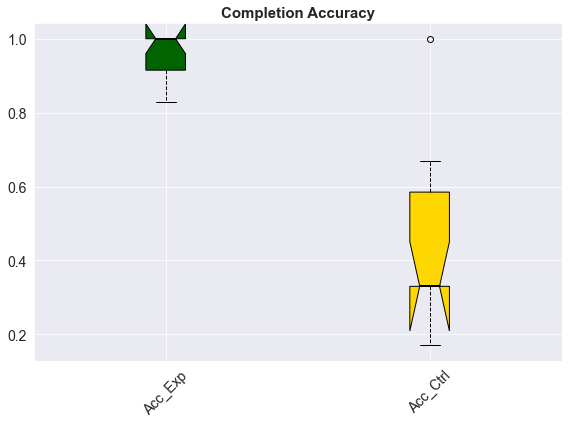

In [23]:

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# TODO: Reorder the columns 
# Create the box plots
labels = ['Acc_Exp', 'Acc_Ctrl']
box_data = [
    processed_group1.iloc[:, 7], processed_group2.iloc[:, 7]
]

colors = ['darkgreen', 'gold']

bp = ax.boxplot(box_data, labels=labels, notch=True, patch_artist=True)
# Set the colors and line widths of the box plot elements
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', linewidth=1)
    box.set_facecolor(color)

for median in bp['medians']:
    median.set(color='black', linewidth=2)
    
for whisker in bp['whiskers']:
    whisker.set_linestyle('--')  # Dashed line
    
# Set the title and labels
ax.set_title('Completion Accuracy', fontsize=15, fontweight="bold")
# Rotate x-tick labels for better readability
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.tight_layout()

# Save it as pdf file
plt.savefig('./images/accuracy_total_boxplot.pdf')

plt.show()

In [24]:
# Output the median and standard deviation of the task completion accuracy for both groups
print("Group 1 median accuracy:", processed_group1['Accuracy'].median())
print("Group 1 accuracy standard deviation:", processed_group1['Accuracy'].std())
print("Group 2 median accuracy:", processed_group2['Accuracy'].median())    
print("Group 2 accuracy standard deviation:", processed_group2['Accuracy'].std())
print("------------------------------------------------------------------")

# Next, output the average of the task completion accuracy for both groups
print("Group 1 average accuracy:", processed_group1['Accuracy'].mean())
print("Group 2 average accuracy:", processed_group2['Accuracy'].mean())

Group 1 median accuracy: 1.0
Group 1 accuracy standard deviation: 0.07940689230447537
Group 2 median accuracy: 0.33
Group 2 accuracy standard deviation: 0.24869111911620956
------------------------------------------------------------------
Group 1 average accuracy: 0.9536363636363636
Group 2 average accuracy: 0.45454545454545453


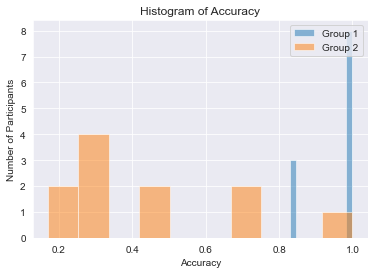

In [25]:
# Make a histogram of the 'Accuracy' column in both data frames

plt.hist(processed_group1['Accuracy'],  alpha=0.5, label='Group 1')
plt.hist(processed_group2['Accuracy'], alpha=0.5, label='Group 2')
plt.legend(loc='upper right')
plt.xlabel('Accuracy')
plt.ylabel('Number of Participants')
plt.title('Histogram of Accuracy')
plt.show()

In [26]:
w, pvalue = stats.shapiro(processed_group1['Accuracy'])
print("Shapiro-Wilk test for Group 1:", w, pvalue)

w, pvalue = stats.shapiro(processed_group2['Accuracy'])
w, pvalue
print("Shapiro-Wilk test for Group 2:", w, pvalue)

Shapiro-Wilk test for Group 1: 0.5724058622066281 1.1574327323944895e-05
Shapiro-Wilk test for Group 2: 0.894123012286445 0.15650187258805304


Based on the Shapiro-Wilk test, the p-value of group1 is 1.1574e-05; thus, we reject the null hypothesis that the data is normally distributed. For the p-value of group2, it is 0.1565; thus, we fail to reject the null hypothesis that the data is normally distributed. <bt><br>

Based on the result above, we will use the Mann-Whitney U test to compare the two groups because the data is not normally distributed.

## Perform the Mann-Whitney U test (Accuracy)

One-tailed hypothesis test: <br>
1. H0: The two groups are the same (i.e., the median of the two groups are equal) <br>
2. H1: The experiment group is better than the control group in terms of the task completion accuracy (i.e., the median of the experiment group is greater than the median of the control group) <br>

In [27]:
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
U_value, p_value = stats.mannwhitneyu(x=processed_group1['Accuracy'], y=processed_group2['Accuracy'], alternative='greater')
print("U value:", U_value, "p value:", p_value)

U value: 114.0 p value: 0.00014548640034563


Based on the result above, we can see that the p-value is 0.000145 which is less than 0.05. Therefore, we reject the null hypothesis and conclude that the experiment group is better than the control group in terms of the number of correct answers. <br>

## Effect Size Calculation

The effect size is a quantitative measure of the magnitude of the difference between two groups. The effect size for the Mann-Whitney U test can be calculated using the formula below: <br>

effect_size = 1 - (2*U) / (n1 * n2) <br>

where U is the Mann-Whitney U statistic and n1 and n2 are the sample sizes of the two groups. (source: https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test#Effect_sizes)<br>

In [28]:
n1 = len(group1)  # Size of the first group
n2 = len(group2)  # Size of the second group

effect_size = abs(1 - ((2 * U_value) / (n1 * n2)))

print("Effect size:", effect_size)

Effect size: 0.884297520661157


Based on the result above, the effect size is 0.88, which is considered a large effect size.

# Analysis of Task Completion Time

First, we will visualize the summary statistics of processed_group1 and processed_group2. Then, we will perform the statistical tests to check if there is a significant difference between the two groups in terms of the task completion time.

In [29]:
# Load the data from the result excel files of group 1 and group 2
group1 = pd.read_excel('./excel_files/group1_task_completion_time.xlsx')
group2 = pd.read_excel('./excel_files/group2_task_completion_time.xlsx')

In [30]:
group1.head()

,ID,Start time,Completion time,(q1.c)Task Completion Time,(q1.cpp)Task Completion Time,(q1.java)Task Completion Time,(q1.js)Task Completion Time,(q1.py)Task Completion Time,(q2.py)Task Completion Time
0,1,2024-04-09 22:10:48,2024-04-09 22:35:27,3.00.36,2.21.2,1.23.97,1.53.94,0.31.53,0.22.16
1,2,2024-04-10 13:06:49,2024-04-10 13:36:16,4.03.47,3.45.08,1.50.83,1.49.54,2.14.74,3.12.37
2,3,2024-04-10 15:11:37,2024-04-10 15:26:37,1.41.27,2.14.69,1.37.95,1.22.13,0.47.98,2.32.47
3,4,2024-04-10 15:39:40,2024-04-10 15:55:08,1.54.81,0.49.98,0.30.69,0.18.17,0.48.50,0.27.77
4,5,2024-04-11 10:34:09,2024-04-11 10:49:06,0.39.50,0.49.11,0.53.74,1.26.85,1.29.68,2.11.50


In [31]:
group2.head()

,ID,Start time,Completion time,(q1.c)Task Completion Time,(q1.cpp)Task Completion Time,(q1.java)Task Completion Time,(q1.js)Task Completion Time,(q1.py)Task Completion Time,(q2.py)Task Completion Time
0,1,2024-04-10 17:58:40,2024-04-10 18:19:36,2.33.23,2.30.61,3.27.36,1.47.84,4.21.16,3.01.77
1,2,2024-04-11 14:03:59,2024-04-11 14:24:31,1.17.71,2.08.34,1.20.31,1.37.70,4.53.81,5.00.00
2,3,2024-04-11 17:03:04,2024-04-11 18:09:24,2.02.85,4.36.16,4.19.19,4.02.15,5.00.00,5.00.00
3,4,2024-04-12 21:09:58,2024-04-12 21:47:40,5.00.00,5.00.00,5.00.00,5.00.00,5.00.00,5.00.00
4,5,2024-04-13 12:16:52,2024-04-13 12:58:41,5.00.00,5.00.00,5.00.00,5.00.00,5.00.00,5.00.00


In [32]:
# Next, drop the Start time and Completion time columns from both data frames
group1 = group1.drop(columns=['ID', 'Start time', 'Completion time'])
group2 = group2.drop(columns=['ID', 'Start time', 'Completion time'])


In [33]:
# Second, the rest of the columns are task completion times. However, the dtype of these columns is object.
# Convert the dtype of these columns to time data type, such as minutes, seconds, and milliseconds.

# Apply the conversion to all columns
for column in group1.columns:
    group1[column] = group1[column].apply(convert_to_timedelta)
    
for column in group2.columns:
    group2[column] = group2[column].apply(convert_to_timedelta)


In [34]:
group1

,(q1.c)Task Completion Time,(q1.cpp)Task Completion Time,(q1.java)Task Completion Time,(q1.js)Task Completion Time,(q1.py)Task Completion Time,(q2.py)Task Completion Time
0,0 days 00:03:00,0 days 00:02:21,0 days 00:01:23,0 days 00:01:53,0 days 00:00:31,0 days 00:00:22
1,0 days 00:04:03,0 days 00:03:45,0 days 00:01:50,0 days 00:01:49,0 days 00:02:14,0 days 00:03:12
2,0 days 00:01:41,0 days 00:02:14,0 days 00:01:37,0 days 00:01:22,0 days 00:00:47,0 days 00:02:32
3,0 days 00:01:54,0 days 00:00:49,0 days 00:00:30,0 days 00:00:18,0 days 00:00:48,0 days 00:00:27
4,0 days 00:00:39,0 days 00:00:49,0 days 00:00:53,0 days 00:01:26,0 days 00:01:29,0 days 00:02:11
5,0 days 00:01:09,0 days 00:02:24,0 days 00:01:53,0 days 00:01:56,0 days 00:00:55,0 days 00:01:46
6,0 days 00:01:11,0 days 00:01:23,0 days 00:01:10,0 days 00:01:23,0 days 00:00:57,0 days 00:01:11
7,0 days 00:01:06,0 days 00:01:55,0 days 00:01:42,0 days 00:01:25,0 days 00:02:40,0 days 00:02:07
8,0 days 00:02:09,0 days 00:02:41,0 days 00:02:35,0 days 00:01:15,0 days 00:02:35,0 days 00:03:51
9,0 days 00:04:07,0 days 00:03:10,0 days 00:03:39,0 days 00:03:34,0 days 00:01:46,0 days 00:03:17


In [35]:
group2

,(q1.c)Task Completion Time,(q1.cpp)Task Completion Time,(q1.java)Task Completion Time,(q1.js)Task Completion Time,(q1.py)Task Completion Time,(q2.py)Task Completion Time
0,0 days 00:02:33,0 days 00:02:30,0 days 00:03:27,0 days 00:01:47,0 days 00:04:21,0 days 00:03:01
1,0 days 00:01:17,0 days 00:02:08,0 days 00:01:20,0 days 00:01:37,0 days 00:04:53,0 days 00:05:00
2,0 days 00:02:02,0 days 00:04:36,0 days 00:04:19,0 days 00:04:02,0 days 00:05:00,0 days 00:05:00
3,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00
4,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00
5,0 days 00:05:00,0 days 00:03:03,0 days 00:05:00,0 days 00:05:00,0 days 00:04:54,0 days 00:04:53
6,0 days 00:01:33,0 days 00:02:22,0 days 00:03:35,0 days 00:04:54,0 days 00:02:57,0 days 00:05:00
7,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:03:31,0 days 00:02:21,0 days 00:02:43
8,0 days 00:05:00,0 days 00:05:00,0 days 00:04:53,0 days 00:05:00,0 days 00:05:00,0 days 00:04:55
9,0 days 00:05:00,0 days 00:03:20,0 days 00:04:01,0 days 00:04:42,0 days 00:03:59,0 days 00:05:00


In [36]:
# Now, calculate the total time taken for each participant in both groups
group1['Total'] = group1.sum(axis=1)
group2['Total'] = group2.sum(axis=1)

In [37]:
group1

,(q1.c)Task Completion Time,(q1.cpp)Task Completion Time,(q1.java)Task Completion Time,(q1.js)Task Completion Time,(q1.py)Task Completion Time,(q2.py)Task Completion Time,Total
0,0 days 00:03:00,0 days 00:02:21,0 days 00:01:23,0 days 00:01:53,0 days 00:00:31,0 days 00:00:22,0 days 00:09:30
1,0 days 00:04:03,0 days 00:03:45,0 days 00:01:50,0 days 00:01:49,0 days 00:02:14,0 days 00:03:12,0 days 00:16:53
2,0 days 00:01:41,0 days 00:02:14,0 days 00:01:37,0 days 00:01:22,0 days 00:00:47,0 days 00:02:32,0 days 00:10:13
3,0 days 00:01:54,0 days 00:00:49,0 days 00:00:30,0 days 00:00:18,0 days 00:00:48,0 days 00:00:27,0 days 00:04:46
4,0 days 00:00:39,0 days 00:00:49,0 days 00:00:53,0 days 00:01:26,0 days 00:01:29,0 days 00:02:11,0 days 00:07:27
5,0 days 00:01:09,0 days 00:02:24,0 days 00:01:53,0 days 00:01:56,0 days 00:00:55,0 days 00:01:46,0 days 00:10:03
6,0 days 00:01:11,0 days 00:01:23,0 days 00:01:10,0 days 00:01:23,0 days 00:00:57,0 days 00:01:11,0 days 00:07:15
7,0 days 00:01:06,0 days 00:01:55,0 days 00:01:42,0 days 00:01:25,0 days 00:02:40,0 days 00:02:07,0 days 00:10:55
8,0 days 00:02:09,0 days 00:02:41,0 days 00:02:35,0 days 00:01:15,0 days 00:02:35,0 days 00:03:51,0 days 00:15:06
9,0 days 00:04:07,0 days 00:03:10,0 days 00:03:39,0 days 00:03:34,0 days 00:01:46,0 days 00:03:17,0 days 00:19:33


In [38]:
group2

,(q1.c)Task Completion Time,(q1.cpp)Task Completion Time,(q1.java)Task Completion Time,(q1.js)Task Completion Time,(q1.py)Task Completion Time,(q2.py)Task Completion Time,Total
0,0 days 00:02:33,0 days 00:02:30,0 days 00:03:27,0 days 00:01:47,0 days 00:04:21,0 days 00:03:01,0 days 00:17:39
1,0 days 00:01:17,0 days 00:02:08,0 days 00:01:20,0 days 00:01:37,0 days 00:04:53,0 days 00:05:00,0 days 00:16:15
2,0 days 00:02:02,0 days 00:04:36,0 days 00:04:19,0 days 00:04:02,0 days 00:05:00,0 days 00:05:00,0 days 00:24:59
3,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:30:00
4,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:30:00
5,0 days 00:05:00,0 days 00:03:03,0 days 00:05:00,0 days 00:05:00,0 days 00:04:54,0 days 00:04:53,0 days 00:27:50
6,0 days 00:01:33,0 days 00:02:22,0 days 00:03:35,0 days 00:04:54,0 days 00:02:57,0 days 00:05:00,0 days 00:20:21
7,0 days 00:05:00,0 days 00:05:00,0 days 00:05:00,0 days 00:03:31,0 days 00:02:21,0 days 00:02:43,0 days 00:23:35
8,0 days 00:05:00,0 days 00:05:00,0 days 00:04:53,0 days 00:05:00,0 days 00:05:00,0 days 00:04:55,0 days 00:29:48
9,0 days 00:05:00,0 days 00:03:20,0 days 00:04:01,0 days 00:04:42,0 days 00:03:59,0 days 00:05:00,0 days 00:26:02


In [39]:
group1.dtypes

(q1.c)Task Completion Time       timedelta64[ns]
(q1.cpp)Task Completion Time     timedelta64[ns]
(q1.java)Task Completion Time    timedelta64[ns]
(q1.js)Task Completion Time      timedelta64[ns]
(q1.py)Task Completion Time      timedelta64[ns]
(q2.py)Task Completion Time      timedelta64[ns]
Total                            timedelta64[ns]
dtype: object

## Sumary Statistics
Now, let's output the summary statistics of the task completion time for both groups across all the challenges.

In [40]:
# Output the average task completion time for each task in group 1
print("Group 1 average task completion time:")
print(group1.mean())

# Output the average task completion time for each task in group 2  
print("Group 2 average task completion time:")
print(group2.mean())

Group 1 average task completion time:
(q1.c)Task Completion Time      0 days 00:01:59.909090909
(q1.cpp)Task Completion Time    0 days 00:02:02.454545454
(q1.java)Task Completion Time             0 days 00:01:40
(q1.js)Task Completion Time     0 days 00:01:38.090909090
(q1.py)Task Completion Time     0 days 00:01:32.545454545
(q2.py)Task Completion Time     0 days 00:02:02.181818181
Total                           0 days 00:10:55.181818181
dtype: timedelta64[ns]
Group 2 average task completion time:
(q1.c)Task Completion Time      0 days 00:03:44.727272727
(q1.cpp)Task Completion Time    0 days 00:03:40.636363636
(q1.java)Task Completion Time   0 days 00:03:59.545454545
(q1.js)Task Completion Time     0 days 00:03:58.454545454
(q1.py)Task Completion Time     0 days 00:04:22.818181818
(q2.py)Task Completion Time     0 days 00:04:32.636363636
Total                           0 days 00:24:18.818181818
dtype: timedelta64[ns]


Here, we draw box plots for the task completion time for each challenge as well as the total task completion time for each group.

In [41]:
# Copy the group1 and group2 data frames to new data frames
group1_bp = group1.copy()
group2_bp = group2.copy()

# Convert timedelta to seconds for plotting
group1_bp = group1_bp.applymap(lambda x: x.total_seconds())
group2_bp = group2_bp.applymap(lambda x: x.total_seconds())

In [42]:
# # Export the data frames to csv files
# group1_bp.to_csv('./csv_files/group1_task_completion_time.csv', index=False)
# group2_bp.to_csv('./csv_files/group2_task_completion_time.csv', index=False)

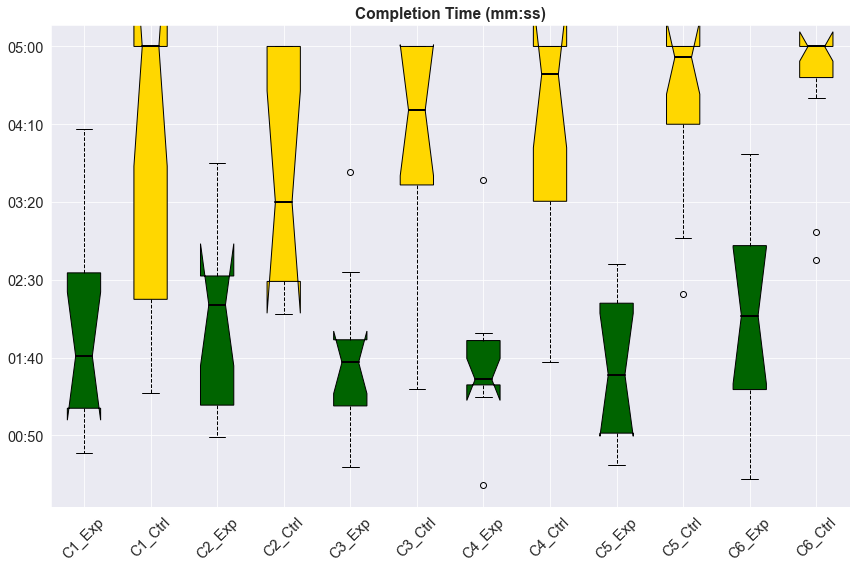

In [43]:
import matplotlib.ticker as ticker

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# TODO: Reorder the columns 
# Create the box plots
labels = ['C1_Exp', 'C1_Ctrl', 'C2_Exp', 'C2_Ctrl', 'C3_Exp', 'C3_Ctrl', 'C4_Exp', 'C4_Ctrl', 'C5_Exp', 'C5_Ctrl', 'C6_Exp', 'C6_Ctrl',]
box_data = [
    group1_bp.iloc[:, 0], group2_bp.iloc[:, 0], group1_bp.iloc[:, 1], group2_bp.iloc[:, 1], group1_bp.iloc[:, 2], group2_bp.iloc[:, 2], 
    group1_bp.iloc[:, 3], group2_bp.iloc[:, 3], group1_bp.iloc[:, 4], group2_bp.iloc[:, 4], group1_bp.iloc[:, 5], group2_bp.iloc[:, 5]
]

colors = ['darkgreen', 'gold', 'darkgreen', 'gold', 'darkgreen', 'gold', 'darkgreen', 'gold', 'darkgreen', 'gold', 'darkgreen', 'gold']

bp = ax.boxplot(box_data, labels=labels, notch=True, patch_artist=True)
# Set the colors and line widths of the box plot elements
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', linewidth=1)
    box.set_facecolor(color)

for median in bp['medians']:
    median.set(color='black', linewidth=2)
    
for whisker in bp['whiskers']:
    whisker.set_linestyle('--')  # Dashed line
    
# Set the title and labels
ax.set_title('Completion Time (mm:ss)', fontsize=15.5, fontweight="bold")
# ax.set_xlabel('Task')
# ax.set_ylabel('Duration (mm:ss)')

# Format y-axis labels to display duration in "mm:ss" format
def timedelta_formatter(y, pos):
    minutes, seconds = divmod(y, 60)
    return f"{int(minutes):02d}:{int(seconds):02d}"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(timedelta_formatter))

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, fontsize=14.5)
plt.yticks(fontsize=14.5)
sns.set_style("darkgrid")
# Display the plot
plt.tight_layout()

# Save the plot in a pdf file
plt.savefig('./images/task_completion_time_per_task.pdf')
plt.show()

Next, output the summary statistics of the task completion time for each group, especially the mean and standard deviation across the challenges.

In [44]:
# Output the median and standard deviation of the total time taken for each group across all tasks
print("Group 1: experimental group")

for i in range(6):
    print(f"Task {i+1}:")
    print("Median:", group1.iloc[:, i].median())
    print("Standard deviation:", group1.iloc[:, i].std())
    
print("----------------------------------------")
print("Group 2: control group")

for i in range(6):
    print(f"Task {i+1}:")
    print("Median:", group2.iloc[:, i].median())
    print("Standard deviation:", group2.iloc[:, i].std())
    # Check the difference compared to the group 1
    print("Difference in median:", group2.iloc[:, i].median() - group1.iloc[:, i].median())
    print("Difference in standard deviation:", group2.iloc[:, i].std() - group1.iloc[:, i].std())
    print("---------------------------------------")


Group 1: experimental group
Task 1:
Median: 0 days 00:01:41
Standard deviation: 0 days 00:01:13.085504096
Task 2:
Median: 0 days 00:02:14
Standard deviation: 0 days 00:00:58.587308585
Task 3:
Median: 0 days 00:01:37
Standard deviation: 0 days 00:00:51.759057178
Task 4:
Median: 0 days 00:01:26
Standard deviation: 0 days 00:00:46.742816657
Task 5:
Median: 0 days 00:01:29
Standard deviation: 0 days 00:00:47.718683209
Task 6:
Median: 0 days 00:02:07
Standard deviation: 0 days 00:01:08.153970070
----------------------------------------
Group 2: control group
Task 1:
Median: 0 days 00:05:00
Standard deviation: 0 days 00:01:34.273104233
Difference in median: 0 days 00:03:19
Difference in standard deviation: 0 days 00:00:21.187600137
---------------------------------------
Task 2:
Median: 0 days 00:03:20
Standard deviation: 0 days 00:01:14.251293224
Difference in median: 0 days 00:01:06
Difference in standard deviation: 0 days 00:00:15.663984639
---------------------------------------
Task 3:


In [45]:
# Now calculate how much does the  task completion time improve in the experimental group compared to the control group in each task. Less time is better.
# We can use the average of the total task completion time for each group to calculate the improvement.

# Calculate the average of the task completion time per task for each group

for i in range(6):
    print(f"Task {i+1}:")
    print("Group 1:", group1.iloc[:, i].mean())
    print("Group 2:", group2.iloc[:, i].mean())
    # Compute the improvement by percentage. the experimental group was expected to complete the task faster than the control group.
    improvement = ((group2.iloc[:, i].mean() - group1.iloc[:, i].mean()) / group2.iloc[:, i].mean()) * 100
    print("Improvement:", improvement)    
    print("---------------------------------------")

Task 1:
Group 1: 0 days 00:01:59.909090909
Group 2: 0 days 00:03:44.727272727
Improvement: 46.64239482198217
---------------------------------------
Task 2:
Group 1: 0 days 00:02:02.454545454
Group 2: 0 days 00:03:40.636363636
Improvement: 44.49938195318418
---------------------------------------
Task 3:
Group 1: 0 days 00:01:40
Group 2: 0 days 00:03:59.545454545
Improvement: 58.254269449636155
---------------------------------------
Task 4:
Group 1: 0 days 00:01:38.090909090
Group 2: 0 days 00:03:58.454545454
Improvement: 58.86389630223149
---------------------------------------
Task 5:
Group 1: 0 days 00:01:32.545454545
Group 2: 0 days 00:04:22.818181818
Improvement: 64.7872708406882
---------------------------------------
Task 6:
Group 1: 0 days 00:02:02.181818181
Group 2: 0 days 00:04:32.636363636
Improvement: 55.18506168746941
---------------------------------------


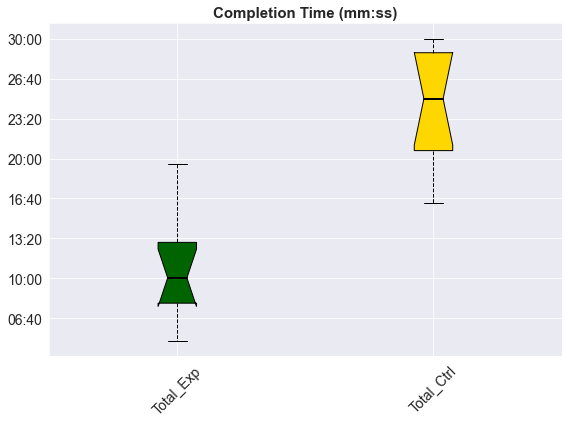

In [46]:
# Next, plot the total task completion time for each participant in both groups

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# TODO: Reorder the columns 
# Create the box plots
labels = ['Total_Exp', 'Total_Ctrl']
box_data = [
    group1_bp.iloc[:, 6], group2_bp.iloc[:, 6]
]

colors = ['darkgreen', 'gold']

bp = ax.boxplot(box_data, labels=labels, notch=True, patch_artist=True)
# Set the colors and line widths of the box plot elements
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', linewidth=1)
    box.set_facecolor(color)

for median in bp['medians']:
    median.set(color='black', linewidth=2)
    
for whisker in bp['whiskers']:
    whisker.set_linestyle('--')  # Dashed line
    
# Set the title and labels
ax.set_title('Completion Time (mm:ss)', fontsize=15, fontweight="bold")
# ax.set_xlabel('Task')
# ax.set_ylabel('Duration (mm:ss)', fontsize=11)

# Format y-axis labels to display duration in "mm:ss" format
def timedelta_formatter(y, pos):
    minutes, seconds = divmod(y, 60)
    return f"{int(minutes):02d}:{int(seconds):02d}"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(timedelta_formatter))

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.tight_layout()
sns.set_style("darkgrid")

# Save it as pdf file
plt.savefig('./images/task_completion_time.pdf')

plt.show()

In [47]:
# Now calculate how much does the overall task completion time improve in the experimental group compared to the control group. Less time is better.
# We can use the average of the total task completion time for each group to calculate the improvement

# Calculate the average total task completion time for each group
avg_total_group1 = group1_bp.iloc[:, 6].mean()
avg_total_group2 = group2_bp.iloc[:, 6].mean()

# Calculate the improvement by percentage. Experimental group was expected to complete the tasks faster.
improvement = ((avg_total_group2 - avg_total_group1) / avg_total_group2) * 100

print("Average total task completion time for the experimental group:", avg_total_group1)
print("Average total task completion time for the control group:", avg_total_group2)    
print("Improvement in task completion time:", improvement)


Average total task completion time for the experimental group: 655.1818181818181
Average total task completion time for the control group: 1458.8181818181818
Improvement in task completion time: 55.08817847572756


In [48]:
# Output the median and standard deviation of the total task completion time for each group
# Median of group 1 in minutes 
print("Median in exp group:", round((group1_bp.iloc[:, 6].describe()[5] / 60), 2)) # Median
# Standard deviation of group 1 in minutes
print("Standard deviation in exp group:", round((group1_bp.iloc[:, 6].describe()[2] / 60), 2)) # Standard deviation

# Median of group 2 in minutes
print("Median in ctrl group:", round((group2_bp.iloc[:, 6].describe()[5] / 60), 2)) # Median
# Standard deviation of group 2 in minutes
print("Standard deviation in ctrl group:", round((group2_bp.iloc[:, 6].describe()[2] / 60), 2)) # Standard deviation


Median in exp group: 10.05
Standard deviation in exp group: 4.48
Median in ctrl group: 24.98
Standard deviation in ctrl group: 4.97


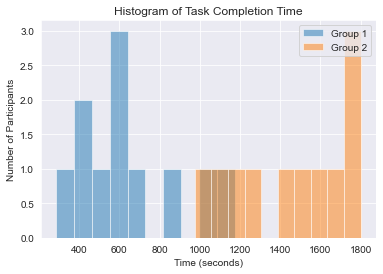

In [49]:
# Plot the distribution of the total time taken for both groups
plt.hist(group1['Total'].dt.total_seconds(), alpha=0.5, label='Group 1')
plt.hist(group2['Total'].dt.total_seconds(), alpha=0.5, label='Group 2')
plt.legend(loc='upper right')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Participants')
plt.title('Histogram of Task Completion Time')
plt.show()

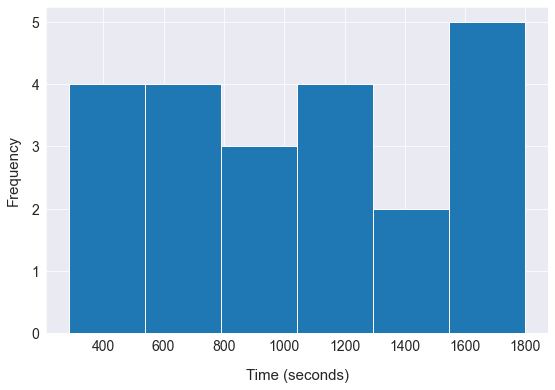

In [50]:
total_seconds_group1 = group1['Total'].dt.total_seconds()
total_seconds_group2 = group2['Total'].dt.total_seconds()

# Combine both groups into one DataFrame
combined_data = pd.concat([total_seconds_group1, total_seconds_group2])
sns.set_style("darkgrid")  # Set style while disabling grid lines
# Set the fig size
plt.figure(figsize=(9, 6))

# Plot the distribution of the total time taken for both groups
sns.histplot(combined_data, color=sns.color_palette("tab10")[0], alpha=1)
# plt.hist(group2['Total'].dt.total_seconds(), alpha=0.5)
# plt.legend(loc='upper right')
plt.xlabel('Time (seconds)', fontsize=15, labelpad=15)
plt.ylabel('Frequency', fontsize=15, labelpad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title('Histogram of Task Completion Time')

# Save it as pdf file
plt.savefig('./images/task_completion_time_histogram.pdf')
plt.show()

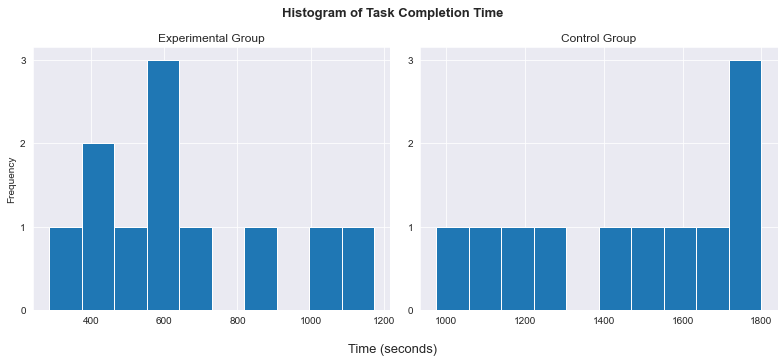

In [51]:
# Create a figure with two subplots (arranged vertically)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

# Plot the distribution of the total time taken for Group 1
axes[0].hist(group1['Total'].dt.total_seconds())
axes[0].set_ylabel('Frequency')
axes[0].set_title('Experimental Group')
axes[0].yaxis.set_major_locator(MaxNLocator(integer=True))

# Plot the distribution of the total time taken for Group 2
axes[1].hist(group2['Total'].dt.total_seconds())
# axes[1].set_ylabel('Number of Participants')
axes[1].set_title('Control Group')
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

fig.suptitle("Histogram of Task Completion Time", fontsize=13, fontweight="bold")
fig.supxlabel('Time (seconds)', fontsize=13)

# Adjust layout so there is no overlap
plt.tight_layout()

# Save the plot as a pdf file
plt.savefig('./images/task_completion_time_histogram.pdf')

# Show the plot
plt.show()

In [52]:
# Create a figure with two subplots (arranged vertically)


# Plot the distribution of the total time taken for Group 1
axes[0].hist(group1['Total'].dt.total_seconds())
axes[0].set_ylabel('Frequency')
axes[0].set_title('Experimental Group')
axes[0].yaxis.set_major_locator(MaxNLocator(integer=True))

# Plot the distribution of the total time taken for Group 2
axes[1].hist(group2['Total'].dt.total_seconds())
# axes[1].set_ylabel('Number of Participants')
axes[1].set_title('Control Group')
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

fig.suptitle("Histogram of Task Completion Time", fontsize=13, fontweight="bold")
fig.supxlabel('Time (seconds)', fontsize=13)

# Adjust layout so there is no overlap
plt.tight_layout()

# Save the plot as a pdf file
plt.savefig('./images/task_completion_time_histogram.pdf')

# Show the plot
plt.show()

<Figure size 432x288 with 0 Axes>

In [53]:
group1['Total_seconds'] = group1['Total'].dt.total_seconds()
group2['Total_seconds'] = group2['Total'].dt.total_seconds()

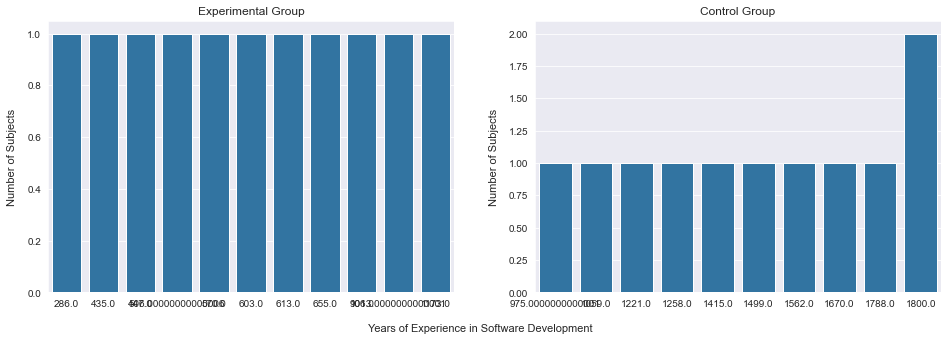

In [54]:

# And, visualize the distribution of the values in "How many years of experience do you have in software development?" column for each group.
# Plot for Group 1
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(
    x='Total_seconds',
    data=group1,
    ax=axs[0],
    color=sns.color_palette("tab10")[0]
)
axs[0].set_title("Experimental Group")
# axs[0].set_xlabel('Years of Experience in Software Development', fontsize=11, labelpad=10)
axs[0].set_xlabel('')
axs[0].set_ylabel('Number of Subjects', fontsize= 11, labelpad=10)

# Plot for Group 2
sns.countplot(
    x='Total_seconds',
    data=group2,
    ax=axs[1],
    color=sns.color_palette("tab10")[0]
)
axs[1].set_title("Control Group")
# axs[1].set_xlabel('Years of Experience in Software Development', fontsize=11, labelpad=10)
axs[1].set_xlabel('')
axs[1].set_ylabel('Number of Subjects', fontsize= 11, labelpad=10)

# fig.suptitle('Distribution of Years of Experience in Software Development for Each Group', fontsize=13)
fig.supxlabel('Years of Experience in Software Development', fontsize=11)

# Save it as pdf file
# plt.savefig('./outputs/years_of_experience_group.pdf', bbox_inches='tight')

plt.show()


In [55]:
import scipy.stats as stats
w, pvalue = stats.shapiro(group1['Total'])
print("Shapiro-Wilk test for Group 1:", w, pvalue)

w, pvalue = stats.shapiro(group2['Total'])
w, pvalue
print("Shapiro-Wilk test for Group 2:", w, pvalue)

Shapiro-Wilk test for Group 1: 0.9242429720493982 0.35557717504564124
Shapiro-Wilk test for Group 2: 0.9196624657334689 0.3158388234013427


Based on the Shapiro-Wilk test, the p-value of group1 is 0.35557717504564124; thus, we fail to reject the null hypothesis that the data is normally distributed. For the p-value of group2, it is 0.3158388234013427; thus, we fail to reject the null hypothesis that the data is normally distributed as well. <bt><br>


Finally, before running the statistical test, we must convert mm:ss to seconds. Then, we will use the Mann-Whitney U test to compare the two groups.

In [56]:
# Convert timedelta to total seconds
group1_total_seconds = group1['Total'].dt.total_seconds()
group2_total_seconds = group2['Total'].dt.total_seconds()

## Perform the Mann-Whitney U test (Task Completion Time)
Source: https://www.reneshbedre.com/blog/mann-whitney-u-test.html <br>

This statistical test will be conducted based on the one-sided hypothesis test. A one-sided hypothesis is an alternative hypothesis strictly bounded from above or from below. (As opposed to a two-sided hypothesis which is the union of two one-sided hypotheses and is thus unbounded from both above and below.) <br>

A one-sided alternative hypothesis is used when the researcher is only interested in one direction of the effect. For example, if the researcher is only interested in whether the treatment group is significantly better than the control group, then a one-sided hypothesis test is appropriate. For example, a superiority test, such as A/B testing, is a one-sided hypothesis test. <br>

1. H0: The two groups are the same (i.e., the median of the two groups are equal) <br>
2. H1: The experiment group is better than the control group in terms of the task completion time (i.e., the median of the experiment group **is less than** the median of the control group) <br>

In [57]:
# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(x=group1_total_seconds, y=group2_total_seconds, alternative='less')
print("U-statistic:", u_stat)
print("P-value:", p_value)

U-statistic: 3.0
P-value: 9.057024802941136e-05


Based on the result above, we can see that the p-value is 9.057024802941136e-05, which is less than 0.05. Therefore, we reject the null hypothesis and conclude that the experiment group completed the task faster than the control group. <br>

Optional: we can also run the two-sided hypothesis test. <br>

In [58]:
u_stat_two_side, p_value_two_side = stats.mannwhitneyu(group1_total_seconds, group2_total_seconds, alternative='two-sided')
print("U-statistic:", u_stat_two_side)
print("P-value:", p_value_two_side)

U-statistic: 3.0
P-value: 0.00018114049605882273


Based on the result above, we can see that the p-value is 0.000181, which is less than 0.05. Therefore, we reject the null hypothesis and conclude that the two groups are different in terms of the task completion time. <br>

## Effect Size Calculation

The effect size is a quantitative measure of the magnitude of the difference between two groups. The effect size for the Mann-Whitney U test can be calculated using the formula below: <br>

effect_size = 1 - (2*U) / (n1 * n2) <br>

where U is the Mann-Whitney U statistic and n1 and n2 are the sample sizes of the two groups. (source: https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test#Effect_sizes)<br>

In [59]:
n1 = len(group1)  # Size of the first group
n2 = len(group2)  # Size of the second group

effect_size = abs(1 - ((2 * u_stat) / (n1 * n2)))

print("Effect size:", effect_size)

Effect size: 0.9504132231404958


Based on the result above, the effect size is 0.95, which is considered a large effect size.

# Conclusion

Based on the statistical analysis, we can conclude that the developed VSCode extension (CodeGuardian) is more efficient than the traditional way of searching for the solutions on the Internet. The participants who used the CodeGuardian extension made fewer errors and completed the task faster than the participants who used the Internet to search for the solutions. This indicates that the Code-Guardian extension can help developers to identify vulnerabilities in the code more accurately and efficiently.